In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [3]:
data = requests.get(url).text

In [4]:
soup = BeautifulSoup(data, "html.parser")

In [5]:
table = soup.find('table')
pop_languages = []

for row in table.find_all('tr'):
    columns = row.find_all('td')
    language = columns[1].getText()
    avg_salary = columns[3].getText()
    difficulty = columns[4].getText()
    pop_languages.append(str(language) + ' , ' + 
                     str(avg_salary).replace('$','').replace(',','') + ' , ' +
                     str(difficulty))

In [6]:
lang_df = pd.DataFrame(pop_languages)
lang_df.columns = lang_df.iloc[0]

In [7]:
DF = lang_df["Language , Average Annual Salary , Learning Difficulty"].str.split(',', expand=True)

In [8]:
DF

,0,1,2
0,Language,Average Annual Salary,Learning Difficulty
1,Python,114383,Easy
2,Java,101013,Easy
3,R,92037,Hard
4,Javascript,110981,Easy
5,Swift,130801,Easy
6,C++,113865,Hard
7,C#,88726,Hard
8,PHP,84727,Easy
9,SQL,84793,Easy


In [9]:
DF.columns = DF.iloc[0]
DF.drop(labels=[0], axis=0, inplace=True)

In [10]:
DF

,Language,Average Annual Salary,Learning Difficulty
1,Python,114383,Easy
2,Java,101013,Easy
3,R,92037,Hard
4,Javascript,110981,Easy
5,Swift,130801,Easy
6,C++,113865,Hard
7,C#,88726,Hard
8,PHP,84727,Easy
9,SQL,84793,Easy
10,Go,94082,Difficult


In [11]:
DF.dtypes

0
Language                   object
 Average Annual Salary     object
 Learning Difficulty       object
dtype: object

In [12]:
DF.columns = ["Language", 'AVG Annual Salary', 'Learning Diff']

In [13]:
DF.dtypes

Language             object
AVG Annual Salary    object
Learning Diff        object
dtype: object

In [14]:
DF['AVG Annual Salary'] = DF['AVG Annual Salary'].astype(int)

In [15]:
DF.sort_values("AVG Annual Salary", ascending=False, inplace=True)

In [16]:
DF

,Language,AVG Annual Salary,Learning Diff
5,Swift,130801,Easy
1,Python,114383,Easy
6,C++,113865,Hard
4,Javascript,110981,Easy
2,Java,101013,Easy
10,Go,94082,Difficult
3,R,92037,Hard
7,C#,88726,Hard
9,SQL,84793,Easy
8,PHP,84727,Easy


Text(0.5, 1.0, 'Popular Languages by Average Annual Job Salary')

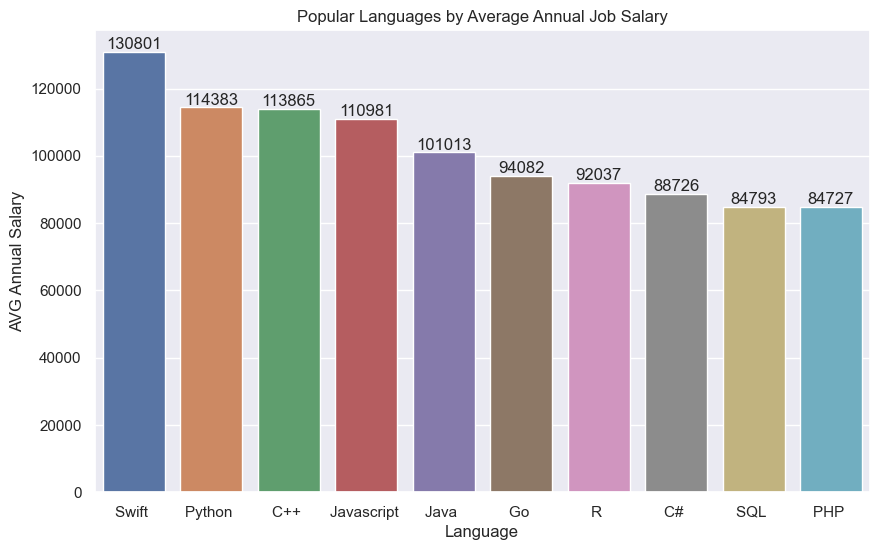

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(data=DF, x="Language", y="AVG Annual Salary")
ax.bar_label(ax.containers[0])
plt.title("Popular Languages by Average Annual Job Salary")
